In [1]:
library(ggplot2)
library(reshape2)


Warning message:
"package 'ggplot2' was built under R version 3.3.2"

In [2]:
# lower.tail	 logical; if TRUE (default), probabilities are P[X ≤ x], otherwise, P[X > x].
# So origin impletation is wrong, get the unsymmetry.

power.binom <- function(x,n=10,x0=0,var=1,alpha=0.05){
    
    p0 <- pnorm(x0,x0,var,lower.tail=FALSE)
    left <- qbinom(alpha/2,n,p0)
    right <- qbinom(alpha/2,n,p0,lower.tail=FALSE)
    prob <- pnorm(x0,x,var)
    #power <- pbinom(left-1,n,prob) + pbinom(right+1,n,prob,lower.tail=FALSE)
    power <- pbinom(left-1,n,prob) + pbinom(right,n,prob,lower.tail=FALSE)
    return(power)
}

power.norm <- function(x,n=10,x0=0,var=1,alpha=0.05){
    left <- qnorm(alpha/2,x0,var/n)
    right <- qnorm(alpha/2,x0,var/n,lower.tail=FALSE)
    power <- pnorm(left,x,var/n) + pnorm(right,x,var/n,lower.tail=FALSE)
    return(power)
}

power.binom.gen <- function(x,x0,q,var,n,alpha){
    left <- qbinom(alpha/2,n,q)
    right <- qbinom(alpha/2,n,q,lower.tail=FALSE)
    mu <- x - sqrt(var)*qnorm(q,0,1)
    qq <- pnorm(x0,mu,var)
    #power <- pbinom(left-1,n,qq) + pbinom(right+1,n,qq,lower.tail=FALSE)
    power <- pbinom(left-1,n,qq) + pbinom(right,n,qq,lower.tail=FALSE)
    return(power)
}

In [3]:
power.binom(c(-1,1),n=30)

[1] 0.9858117 0.9858117

In [4]:
power.binom.gen(c(-1,1),0,0.5,1,30,0.05)

[1] 0.9858117 0.9858117

In [5]:
pbinom(qbinom(0.025,10,0.5,lower.tail=FALSE)-1,10,0.5,lower.tail=FALSE)

[1] 0.0546875

In [6]:
x <- seq(-0.5,0.5,0.01)
pb50 <- power.binom(x,n=50)
pb100 <- power.binom(x,n=100)
pb200 <- power.binom(x,n=200)
pn10 <- power.norm(x,n=10)
pn50 <- power.norm(x,n=50)


df = data.frame(x=x, pn10=pn10, pn50=pn50, pb50=pb50, pb100=pb100, pb200=pb200)


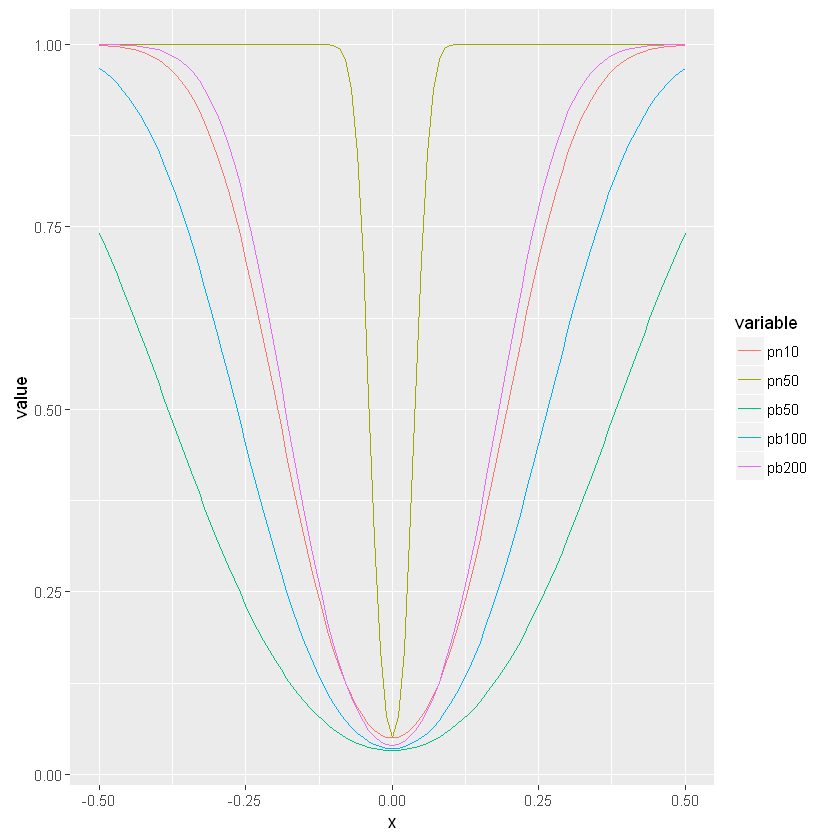

In [7]:
base <- ggplot(data = melt(df,id="x",measure=names(df)[names(df)!='x']), aes(x,value,colour = variable)) 
base + geom_line()

In [9]:
min.n.binom <- function(p,x,x0=0,q=0.5,var=1,alpha=0.05){
    n <- 2
    repeat{
        power <- power.binom.gen(x,x0,q,var,n,alpha)
        if(power >= p)
            return(n)
        n <- n + 1
    }
}


In [10]:
min.n.binom(0.99,-1)

[1] 35

In [31]:
min.n.binom(0.95,-0.1)

[1] 2050

In [22]:
min.n.norm <- function(p,x,x0=0,var=1,alpha=0.05){
    n <- 2
    repeat{
        power <- power.norm(x,n=n,x0=x0,var=var,alpha=alpha)
        if(power >= p)
            return(n)
        n <- n + 1
    }
}

In [32]:
min.n.norm(0.95,-0.1)

[1] 37

In [33]:
min.n.binom(0.95,-0.05)

[1] 8197

In [34]:
min.n.norm(0.95,-0.05)

[1] 73

In [35]:
min.n.binom(0.95,-0.01)

[1] 204203

In [36]:
min.n.norm(0.95,-0.01)

[1] 361